In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install imblearn
!pip install keras
!pip install tensorflow
from tensorflow import keras



from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
data = pd.read_csv("Employee.csv")

data.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [7]:
def normalize(n):
    return sklearn.preprocessing.minmax_scale(n,feature_range=(0,1), axis=0, copy=True)
data["JoiningYear"] = normalize(data["JoiningYear"])
data["PaymentTier"] = normalize(data["PaymentTier"])
data["Age"] = normalize(data["Age"])
data["ExperienceInCurrentDomain"] = normalize(data["ExperienceInCurrentDomain"])
data["LeaveOrNot"] = normalize(data["LeaveOrNot"])

data.head()

Education  JoiningYear       City  PaymentTier       Age  Gender  \
0  Bachelors     0.833333  Bangalore          1.0  0.631579    Male   
1  Bachelors     0.166667       Pune          0.0  0.315789  Female   
2  Bachelors     0.333333  New Delhi          1.0  0.842105  Female   
3    Masters     0.666667  Bangalore          1.0  0.263158    Male   
4    Masters     0.833333       Pune          1.0  0.105263    Male   

  EverBenched  ExperienceInCurrentDomain  LeaveOrNot  
0          No                   0.000000         0.0  
1          No                   0.428571         1.0  
2          No                   0.285714         0.0  
3          No                   0.714286         1.0  
4         Yes                   0.285714         1.0

In [8]:
data.shape

(4653, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4653 non-null   float64
 2   City                       4653 non-null   object 
 3   PaymentTier                4653 non-null   float64
 4   Age                        4653 non-null   float64
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   float64
 8   LeaveOrNot                 4653 non-null   float64
dtypes: float64(5), object(4)
memory usage: 327.3+ KB


In [10]:
data.columns[data.dtypes != 'object']

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')

In [11]:
data.rename(columns={'ExperienceInCurrentDomain': 'Experience'}, inplace=True)


In [12]:
data.columns[data.dtypes == 'object']

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')

In [13]:

data.head()

Education  JoiningYear       City  PaymentTier       Age  Gender  \
0  Bachelors     0.833333  Bangalore          1.0  0.631579    Male   
1  Bachelors     0.166667       Pune          0.0  0.315789  Female   
2  Bachelors     0.333333  New Delhi          1.0  0.842105  Female   
3    Masters     0.666667  Bangalore          1.0  0.263158    Male   
4    Masters     0.833333       Pune          1.0  0.105263    Male   

  EverBenched  Experience  LeaveOrNot  
0          No    0.000000         0.0  
1          No    0.428571         1.0  
2          No    0.285714         0.0  
3          No    0.714286         1.0  
4         Yes    0.285714         1.0

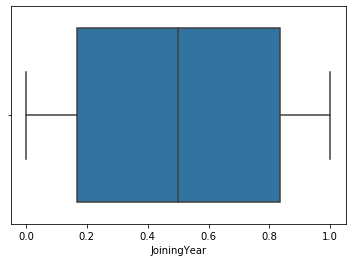

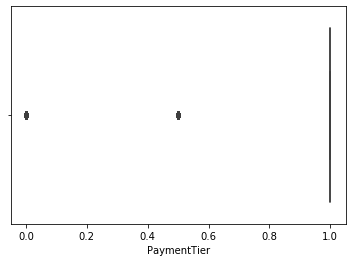

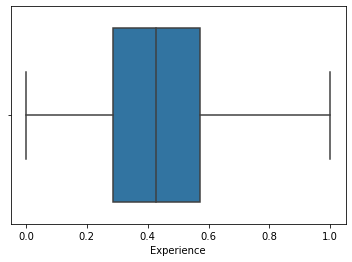

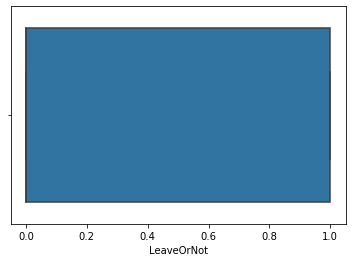

In [14]:
for i, col in enumerate(list(data.columns[data.dtypes != 'object'])):
  plt.figure(i)
  ax = sns.boxplot(x=data[col])

In [15]:
data.agg(['count', 'min', 'max', 'mad', 'mean', 'median', 'quantile', 'kurt', 'skew', 'var', 'std'])

Education  JoiningYear       City  PaymentTier          Age  Gender  \
count          4653  4653.000000       4653  4653.000000  4653.000000    4653   
min       Bachelors     0.000000  Bangalore     0.000000     0.000000  Female   
max             PHD     1.000000       Pune     1.000000     1.000000    Male   
mad             NaN     0.266212        NaN     0.226452     0.208913     NaN   
mean            NaN     0.510495        NaN     0.849130     0.389121     NaN   
median          NaN     0.500000        NaN     1.000000     0.315789     NaN   
quantile        NaN     0.500000        NaN     1.000000     0.315789     NaN   
kurt            NaN    -1.204425        NaN     1.912203    -0.299823     NaN   
skew            NaN    -0.113462        NaN    -1.709531     0.905195     NaN   
var             NaN     0.096449        NaN     0.078802     0.064518     NaN   
std             NaN     0.310563        NaN     0.280718     0.254005     NaN   

         EverBenched   Experience   LeaveOrNot  
count           4653  4653.000000  4653.000000  
min               No     0.000000     0.000000  
max              Yes     1.000000     1.000000  
mad              NaN     0.189083     0.451243  
mean             NaN     0.415093     0.343864  
median           NaN     0.428571     0.000000  
quantile         NaN     0.428571     0.000000  
kurt             NaN    -0.969413    -1.568196  
skew             NaN    -0.162556     0.657631  
var              NaN     0.049553     0.225670  
std              NaN     0.222606     0.475047

In [16]:
data.hist(figsize=(25,25), ec='w')
plt.show()

In [17]:
print(data.isnull().sum())   
print(len(data.values))
data.dropna(how="any",inplace=True) 
print(len(data.values))

Education      0
JoiningYear    0
City           0
PaymentTier    0
Age            0
Gender         0
EverBenched    0
Experience     0
LeaveOrNot     0
dtype: int64
4653
4653


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
cat_cols=['Education','JoiningYear','City','Gender','EverBenched']

In [25]:
for i in cat_cols:
    data[i]=le.fit_transform(data[i])

In [27]:
data.head()

Education  JoiningYear  City  PaymentTier       Age  Gender  EverBenched  \
0          0            5     0          1.0  0.631579       1            0   
1          0            1     2          0.0  0.315789       0            0   
2          0            2     1          1.0  0.842105       0            0   
3          1            4     0          1.0  0.263158       1            0   
4          1            5     2          1.0  0.105263       1            1   

   Experience  LeaveOrNot  
0    0.000000         0.0  
1    0.428571         1.0  
2    0.285714         0.0  
3    0.714286         1.0  
4    0.285714         1.0

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X = data.drop(columns=["LeaveOrNot"])
y = data[["LeaveOrNot"]]


X_res, y_res = sm.fit_resample(X,y)


Counter({0.0: 3053, 1.0: 3053})


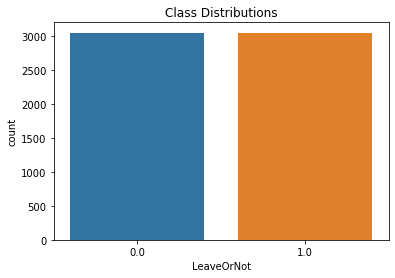

In [30]:
data = X_res
data["LeaveOrNot"] = y_res

sns.countplot('LeaveOrNot', data = data)
plt.title('Class Distributions')

print(Counter(data["LeaveOrNot"]))

In [31]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=20, shuffle=True)

trainX = train_df.drop("LeaveOrNot", axis=1)
trainy = train_df["LeaveOrNot"]

testX = test_df.drop("LeaveOrNot", axis = 1)
testy = test_df["LeaveOrNot"]

col_count = len(trainX.columns)
print(col_count)

8


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(10, input_dim=col_count, activation='sigmoid'))
model.add(Dense(5, activation='softplus'))
model.add(Dense(1, activation='tanh'))

model.summary()

adamOptimizer = optimizers.Adam(learning_rate=0.005)

model.compile(loss='binary_crossentropy', optimizer=adamOptimizer, metrics="accuracy")

model.fit(trainX, trainy, epochs=150, batch_size=10, verbose = True)

_, accuracy = model.evaluate(testX, testy)

print("Accuracy: " + str(accuracy))


ModuleNotFoundError: No module named 'tensorflow.compat.v2'

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

model = keras.Sequential()

model.add(Dense(10, input_dim=col_count, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

adamOptimizer = optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=adamOptimizer, metrics="accuracy")

model.fit(trainX, trainy, epochs=150, batch_size=10, verbose = True)

_, accuracy = model.evaluate(testX, testy)

print("Accuracy: " + str(accuracy))

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers, initializers

model = keras.Sequential()

model.add(Dense(6, input_dim=col_count, activation='relu', kernel_initializer=initializers.RandomNormal(), bias_initializer=initializers.RandomNormal()))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.005)
#adamOptimizer = optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics="accuracy")

model.fit(trainX, trainy, epochs=150, batch_size=10, verbose = True)

_, accuracy = model.evaluate(testX, testy)

print("Accuracy: " + str(accuracy))

In [67]:
metrics = [
           keras.metrics.Accuracy()
          ]
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'], loss=keras.losses.BinaryCrossentropy())

In [68]:
history = model.fit(X_train, y_train, batch_size=64, epochs=250, verbose=2, shuffle=True, validation_split=0.20, callbacks=[callback])

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)